# Hypothesis testing in Machine learning using Python

**Hypothesis testing**:
Hypothesis are statement about the given problem. Hypothesis testing is a statistical method that is used in making a statistical decision using experimental data. Hypothesis testing is basically an assumption that we make about a population parameter. It evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data.

Example:
You say an average student in the class is 30 or a boy is taller than girls. All those are an example in which we assume or need some statistic way to prove those. We need some mathematical conclusion whatever we are assuming is true.

**Need for Hypothesis Testing**:
Hypothesis testing is an important procedure in statistics. Hypothesis testing evaluates two mutually exclusive population statements to determine which statement is most supported by sample data. When we say that the findings are statistically significant, it is thanks to hypothesis testing.

# TYPES OF HYPOTHESIS TEST

## Normality Tests:

* Shapiro-Wilk Test
* D’Agostino’s K^2 Test
* Anderson-Darling Test

* Correlation Tests:
* Pearson’s Correlation Coefficient
* Spearman’s Rank Correlation
* Kendall’s Rank Correlation
* Chi-Squared Test

## Nonparametric Statistical Hypothesis Tests:
* Mann-Whitney U Test
* Wilcoxon Signed-Rank Test
* Kruskal-Wallis H Test
* Friedman Test


## Stationary Tests:
* Augmented Dickey-Fuller
* Kwiatkowski-Phillips-Schmidt-Shin

## Parametric Statistical Hypothesis Tests:
* Student’s t-test
* Paired Student’s t-test
* Analysis of Variance Test (ANOVA)
* Repeated Measures ANOVA Test



## some of widely used hypothesis testing type

* T-Test

* Chi-square Test

* Correlation Test

* Analysis of Variance (ANOVA)

**T-TEST**:
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features. It is mostly used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances.

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

* One sample t-test : The One Sample t-Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t-Test is a parametric test.

* Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

**Paired sampled t-test** :- The paired sample t-test is also called dependent sample t-test. It’s an uni variate test that tests for a significant difference between 2 related variables.

**Chi-Square Test**- The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

**ANOVA (F-TEST)** :- The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time. For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable. We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

Correlation Tests are used to determine the presence and extent of a linear relationship between two quantitative variables. 

# Error in Hypothesis Testing

* Type I error: When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha.
* Type II errors: When we accept the null hypothesis but it is false. Type II errors are denoted by beta.

# Parameters of hypothesis testing

* Null hypothesis(H0): In statistics, the null hypothesis is a general given statement or default position that there  is no relationship between two measured cases or no relationship among groups.In other words, it is a basic assumption or made based on the problem knowledge.
Example: A company production is = 50 unit/per day etc.

* Alternative hypothesis(H1): The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis.
Example : A company production is not equal to 50 unit/per day etc.

* Level of significance:
It refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting a hypothesis, so we, therefore, select a level of significance that is usually 5%. This is normally denoted with \alpha and generally, it is 0.05 or 5%, which means your output should be 95% confident to give similar kind of result in each sample

* P-value
The P value, or calculated probability, is the probability of finding the observed/extreme results when the null hypothesis(H0) of a study given problem is true. If your P-value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample claims to support the alternative hypothesis.

* Example :
Given a coin and it is not known whether that is fair or tricky so let’s decide null and alternate hypothesis

Null Hypothesis(H0): a coin is a fair coin.
Alternative Hypothesis(H1) : a coin is a tricky coin.
\alpha = 5% or 0.05
Now let’s toss the coin and calculate p-value (probability value).

Toss a coin 1st time and assume that result is head- P-value = 50% (as head and tail have equal probability)
Toss a coin 2nd time and assume that result again is head, now p-value = 50/2 = 25%
and similarly, we Toss 6 consecutive time and got the result as all heads, now P-value = 1.5%
But we set our significance level as 95% means 5% error rate we allow and here we see we are beyond that level i.e. our null- hypothesis does not hold good so we need to reject and propose that this coin is a tricky coin which is actually because it gives us 6 consecutive heads.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import time
import statsmodels.api as sm

## Using Stock Market data for finding out the probability return 

In [2]:
from alpha_vantage.timeseries import TimeSeries


api_key = '8L9BZMZCLAJXH0PQ'

In [3]:
ts = TimeSeries(key = api_key, output_format = 'pandas')
main_data,metadata = ts.get_daily(symbol = 'TCS', outputsize = 'full')
print(main_data)

            1. open  2. high  3. low  4. close   5. volume
date                                                      
2020-08-07     3.21     3.40   3.200      3.32    138783.0
2020-08-06     3.28     3.32   3.160      3.20    121905.0
2020-08-05     3.28     3.32   3.220      3.30    103860.0
2020-08-04     3.31     3.34   3.120      3.22    403466.0
2020-08-03     3.42     3.54   3.350      3.50    234342.0
...             ...      ...     ...       ...         ...
2013-11-07    36.80    36.80  34.120     35.31    883700.0
2013-11-06    35.61    36.49  35.610     35.90    549600.0
2013-11-05    35.11    35.50  34.821     35.35    337700.0
2013-11-04    36.80    36.80  34.690     35.35   1586600.0
2013-11-01    35.00    37.00  32.100     36.20  14667600.0

[1703 rows x 5 columns]


In [4]:
data = main_data.copy()

In [5]:
main_data.to_csv("TCS.csv")

In [6]:
data.head()

1. open  2. high  3. low  4. close  5. volume
date                                                     
2020-08-07     3.21     3.40    3.20      3.32   138783.0
2020-08-06     3.28     3.32    3.16      3.20   121905.0
2020-08-05     3.28     3.32    3.22      3.30   103860.0
2020-08-04     3.31     3.34    3.12      3.22   403466.0
2020-08-03     3.42     3.54    3.35      3.50   234342.0

In [7]:
data = data.rename(columns={"1. open": "Open", "2. high": "High", "3. low" : "Low", "4. close" : "Close", "5. volume" : "Volume"})
data.head()

Open  High   Low  Close    Volume
date                                         
2020-08-07  3.21  3.40  3.20   3.32  138783.0
2020-08-06  3.28  3.32  3.16   3.20  121905.0
2020-08-05  3.28  3.32  3.22   3.30  103860.0
2020-08-04  3.31  3.34  3.12   3.22  403466.0
2020-08-03  3.42  3.54  3.35   3.50  234342.0

In [8]:
#close price of tomorrow
data['price 1'] = data['Close'].shift(-1)

#close price of tomorrow - close price of today
data['price_diff'] = data['price 1'] - data['Close']

#daily return --- > Price difference /  Close price of Today
data['daily_return %'] = (data['price_diff'] / data['Close']) * 100

In [9]:
data.head()

Open  High   Low  Close    Volume  price 1  price_diff  \
date                                                                 
2020-08-07  3.21  3.40  3.20   3.32  138783.0     3.20       -0.12   
2020-08-06  3.28  3.32  3.16   3.20  121905.0     3.30        0.10   
2020-08-05  3.28  3.32  3.22   3.30  103860.0     3.22       -0.08   
2020-08-04  3.31  3.34  3.12   3.22  403466.0     3.50        0.28   
2020-08-03  3.42  3.54  3.35   3.50  234342.0     3.45       -0.05   

            daily_return %  
date                        
2020-08-07       -3.614458  
2020-08-06        3.125000  
2020-08-05       -2.424242  
2020-08-04        8.695652  
2020-08-03       -1.428571

In [10]:
mean = data['daily_return %'].mean()
std = data['daily_return %'].std(ddof=1)

print("Mean : ", mean," & ", "Standard Deviation: ", std)

Mean :  0.25273173590101233  &  Standard Deviation:  4.947212535886139


Assuming that the mean price difference of TCS stock is normally distributed with a mean of 0.25 with a standard deviation of 4.94. What is the estimate that the daily return would be less than 5%

In [11]:
denApp = pd.DataFrame()
denApp['x'] = np.arange(-20,20,0.1)
denApp['pdf'] = norm.pdf(denApp['x'],mean,std)

In [12]:
denApp.head()

x       pdf
0 -20.0  0.000019
1 -19.9  0.000020
2 -19.8  0.000022
3 -19.7  0.000024
4 -19.6  0.000026

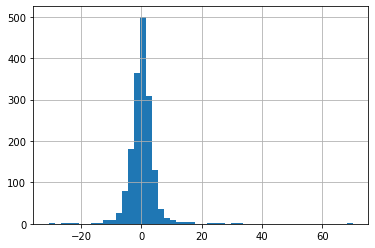

In [13]:
data['daily_return %'].hist(bins=50)

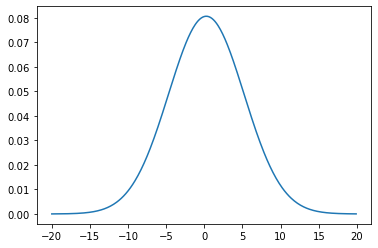

In [14]:
plt.plot(denApp['x'],denApp['pdf'])

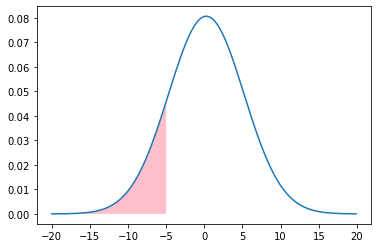

In [15]:
plt.plot(denApp['x'],denApp['pdf'])
plt.fill_between(x = np.arange(-20,-5,0.01),
                y2 = 0,
                y1 = norm.pdf(np.arange(-20,-5,0.01),mean,std),
                facecolor = 'pink')

In [16]:
#to find the probability of return less than 5% we can use CDF
prob_return = norm.cdf(-5,mean,std)
print("The probability for return less than -5% is ", prob_return)

The probability for return less than -5% is  0.14417327405858132


## Some more Examples for Hypothesis Testing

### One Population Proportion

In previous years, 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media?

Population: Parents with a teenager (age 13-18)
Parameter of Interest: p

Null Hypothesis: p = 0.52

Alternative Hypthosis: p > 0.52 (note that this is a one-sided test)

Data: 1018 people were surveyed. 56% of those who were surveyed believe that their teenager’s lack of sleep is caused due to electronics and social media.

In [17]:
n = 1018
pnull = .52
phat = .56

sm.stats.proportions_ztest(phat * n,
                           n, pnull,
                           alternative='larger')

(2.571067795759113, 0.005069273865860533)

Conclusion of the hypothesis test

Since the calculated p-value of the z-test is pretty small, we can reject the Null hypothesis that the percentage of parents, who believe that their teenager’s lack of sleep is caused due to electronics and social media, is as same as previous years' estimate i.e. 52%.

Although, we do not accept the alternate hypothesis, this informally means that there is a good chance of this proportion being more than 52%.

### Difference in Population Proportions¶

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

Populations: All parents of black children age 6-18 and all parents of Hispanic children age 6-18

Parameter of Interest: p1 - p2, where p1 = black and p2 = hispanic

Null Hypothesis: p1 - p2 = 0
Alternative Hypthosis: p1 - p2 $\neq$ = 0

Data: 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons.
308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.

---------------------------------------------------------------------------------------------------------------------

In [18]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

sm.stats.ttest_ind(population1, population2)

(-0.5073159907542905, 0.6121353695871812, 553.0)

**Conclusion of the hypothesis test**

Since the p-value is quite high , we cannot reject the Null hypothesis in this case i.e. the difference in the population proportions are not statistically significant.

#### But what happens if we could survey much higher number of people?

In [19]:
n1 = 5000
p1 = .37

n2 = 5000
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [20]:
sm.stats.ttest_ind(population1, population2)

(-3.4581865460830583, 0.0005460897546522394, 9998.0)

### One Population Mean

Let's say a cartwheeling competition was organized for some adults. 

In [21]:
cart_data = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

Is distance Is the average cartwheel distance (in inches) for adults more than 80 inches?

Population: All adults
Parameter of Interest: $\mu$, population mean cartwheel distance.

Null Hypothesis: $\mu$ = 80

Alternative Hypthosis: $\mu$ > 80

In [22]:
n = len(cart_data)
mean = cart_data.mean()
sd = cart_data.std()
print("Mean: ", mean)
print("Total Population: ", n)
print("Standard Deviation: ", std)

Mean:  83.84320000000001
Total Population:  25
Standard Deviation:  4.947212535886139


In [23]:
sm.stats.ztest(cart_data, value = 80,
               alternative = "larger")

(1.756973189172546, 0.039461189601168366)

**Conclusion of the hypothesis test**

Since the p-value (0.0394) is lower than the standard confidence level 0.05, we can reject the Null hypothesis that the mean cartwheel distance for adults (a population quantity) is equal to 80 inches. There is strong evidence in support for the alternatine hypothesis that the mean cartwheel distance is, in fact, higher than 80 inches

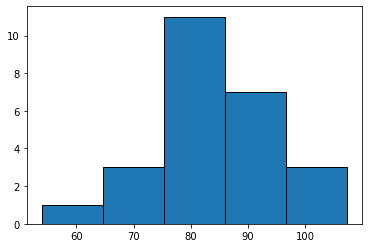

In [24]:
#proving the same
plt.hist(cart_data,bins=5,edgecolor='k')
plt.show()

### Difference in Population Means

Considering adults in the NHANES data, do females have a significantly higher mean Body Mass Index than males?

Population: Adults in the NHANES data.

Parameter of Interest: $\mu_1 - \mu_2$, Body Mass Index.

Null Hypothesis: $\mu_1 = \mu_2$

Alternative Hypthosis: $\mu_1 \neq \mu_2$

In [25]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       5.0  ...   124.0    64.0   94.8  184.5    27.8    43.3   
1       2.0       3.0  ...   140.0    88.0   90.4  171.4    30.8    38.0   
2       1.0       3.0  ...   132.0    44.0   83.4  170.1    28.8    35.6   
3       1.0       5.0  ...   134.0    68.0  109.8  160.9    42.4    38.5   
4       1.0       4.0  ...   114.0    54.0   55.2  164.9    20.3    37.4   

   BMXARML  BMXARMC  BMXWAIST  HIQ210  
0     43.6     35.9     101.1     2.0  
1     40.0     33.2     107.9     NaN  
2     37.0     31.0     116.5     2.0  
3     37.7     38.3     110.1     2.0  
4     36.0     27.2      80.4     2.0  

[5 rows x 28 columns]

In [26]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [27]:
#for females
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

print("Mean of Female BMI: ", mu1)
print("Total Population of Females: ", n1)
print("Standard Deviation: ", sd1)

Mean of Female BMI:  29.939945652173996
Total Population of Females:  2976
Standard Deviation:  7.75331880954568


In [28]:
#for males
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

print("Mean of Male BMI: ", mu2)
print("Total Population of Male: ", n2)
print("Standard Deviation: ", sd2)

Mean of Male BMI:  28.778072111846985
Total Population of Male:  2759
Standard Deviation:  6.252567616801485


In [29]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

Since the p-value (6.59e-10) is extremely small, we can reject the Null hypothesis that the mean BMI of males is same as that of females.

Note, we used alternative="two-sided" in the z-test because here we are checking for inequality.

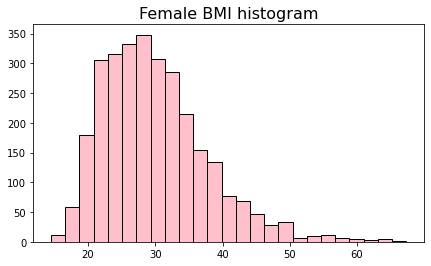

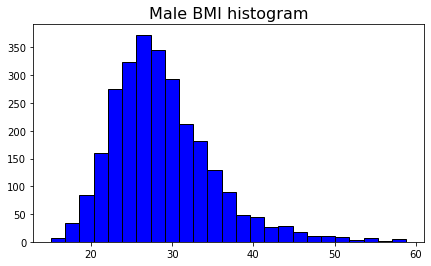

In [30]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()

#### One more Example

Do females buy more cycles than male?

Population: Constumer Data.

Parameter of Interest: $\mu_1 - \mu_2$, Price.

Null Hypothesis: $\mu_1 = \mu_2$

Alternative Hypthosis: $\mu_1 \neq \mu_2$

In [31]:
df = pd.read_excel("Dataset_for_hypothesis_testing.xlsx")
df.head()

brand  customer_id  GENDER    Price
0  Giant Bicycles        462.0  Female  1274.93
1  Giant Bicycles        234.0  Female  1977.36
2  Giant Bicycles       3490.0    Male   642.70
3  Giant Bicycles       3010.0  Female  1274.93
4  Giant Bicycles       2488.0  Female   642.70

In [32]:
female = df[df["GENDER"] == 'Female']
male = df[df["GENDER"] == 'Male']

In [33]:
#for females
n1 = len(female)
mu1 = female["Price"].mean()
sd1 = female["Price"].std()

print("Mean: ", mu1)
print("Total Population of Females: ", n1)
print("Standard Deviation: ", sd1)

Mean:  1114.7396715328427
Total Population of Females:  1644
Standard Deviation:  581.0153772238351


In [34]:
#for males
n2 = len(male)
mu2 = male["Price"].mean()
sd2 = male["Price"].std()

print("Mean: ", mu2)
print("Total Population of Male: ", n2)
print("Standard Deviation: ", sd2)

Mean:  1076.775239294706
Total Population of Male:  1588
Standard Deviation:  565.4735325224066


In [35]:
sm.stats.ztest(female["Price"], male["Price"]
               ,alternative='two-sided')

(1.8816359310353126, 0.05988546417785351)

**Conclusion of the hypothesis test**

Since the p-value (0.059) is greater than the standard confidence level 0.05, we can't reject the Null hypothesis